In [1]:
# Introduction to Machine Learning

# rows and columns are usually reffered to as M x N
# coefficients are usualy called parameters or weights in ML
# It makes, sens, a coefficient nn is multiplied by a vector x = (1, 2, 3), so it's like a weight.

# Cost function is a function that calculates whether the predictions of a set of parameters
# is a good prediction. So it basically evaluates the predictions of a set of paramteres.
# In linear models it is the root sum squared error or RSSE

# In principle there could be other cost functions. You could create one yourself to evaluate
# lower or higher than values rather than the overall values.

# The cost function is highly dependent on the same sample size. Makes sense. If a new
# row is added with extreme values, then the cost function is highly variable.

# It is for this reason that we get the R-MEAN-SE. So we get the mean/median of the squared errors.

# The evaluation of the model is tried on every single value of every parameter
# and with every combination of numbers it evaluates the cost function. It gets
# to a point where it finds the minimum value where on both sides in
# would be higher. This is called the gradient descent

# -       -
#  -     -
#   -   -
#    - -
#     X # the local minimum!!
# --------------------
#


# How do you control the tolerance or change in the gradient descent? With
# alpha or hyper-parameter. A little alpha means that you need more iterations
# to find a local minimum. A higher alpha can on the other hand increase
# the cost function.

# There is different values to alpha but also different stragigies. You can begin
# with a big alpha/hyper paramter and when you're within a certain slice of the
# curve, change to a smaller alpha.

# In other scenarions you can calculate the derivative of the function right away
# without calculating the minimum local. (This I don't understand very much.)
# They said that if you know the shape of the linear combination you can
# calculate the derivative without applying a gradient descent.

# When we estimate a cost function for two values x_1 and x_2 we might
# estimate values that are very high (they should be very low).
# Regularization is used to penalize the cost function so that it doesn't go very low.
# I don't understand this. I would if it meant that if x_1 and x_2 are going
# too high and they're overfitting the model, then we penalize the cost function
# by the same degree of overfitting to have a more unbiased cost function.
# But I don't think it's this way.

# Finally you divie the data into test/training and test your trained data model on
# the test data to seee if it works.

# Exercises

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population','Profit'])

In [36]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


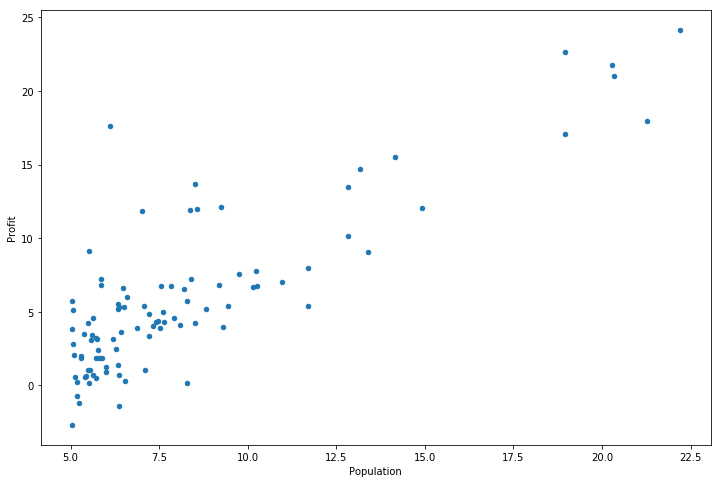

In [37]:
data.plot(kind="scatter", x='Population', y='Profit', figsize=(12,8), )

In [38]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [39]:
data.insert(0, 'Ones', 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [40]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
Y = data.iloc[:,cols-1:cols]
Y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [41]:
X = np.matrix(X.values)
Y = np.matrix(Y.values)
theta = np.matrix(np.array([0,0]))

In [42]:
X.shape, theta.shape, Y.shape

((97, 2), (1, 2), (97, 1))

In [76]:
computeCost(X, Y, theta)

matrix([[0, 0]])

In [77]:
def GradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [78]:
g, cost = GradientDescent(X, Y, theta, alpha = 0.01, iters = 1000)

[[0]
 [0]]
[[0.05839135]
 [0.6532885 ]]
[[0.06289175]
 [0.77000978]]
[[0.05782293]
 [0.79134812]]
[[0.05106363]
 [0.79572981]]
[[0.04401438]
 [0.79709618]]
[[0.03692413]
 [0.79792547]]
[[0.02983712]
 [0.79865824]]
[[0.02276118]
 [0.79937279]]
[[0.0156977 ]
 [0.80008305]]
[[0.0086469]
 [0.8007915]]
[[0.00160879]
 [0.80149857]]
[[-0.00541662]
 [ 0.80220436]]
[[-0.01242938]
 [ 0.80290886]]
[[-0.01942949]
 [ 0.8036121 ]]
[[-0.02641699]
 [ 0.80431407]]
[[-0.03339189]
 [ 0.80501478]]
[[-0.04035421]
 [ 0.80571422]]
[[-0.04730399]
 [ 0.8064124 ]]
[[-0.05424124]
 [ 0.80710932]]
[[-0.06116598]
 [ 0.80780498]]
[[-0.06807824]
 [ 0.8084994 ]]
[[-0.07497804]
 [ 0.80919256]]
[[-0.08186541]
 [ 0.80988447]]
[[-0.08874035]
 [ 0.81057513]]
[[-0.09560291]
 [ 0.81126455]]
[[-0.10245309]
 [ 0.81195272]]
[[-0.10929093]
 [ 0.81263966]]
[[-0.11611644]
 [ 0.81332535]]
[[-0.12292965]
 [ 0.81400981]]
[[-0.12973057]
 [ 0.81469304]]
[[-0.13651924]
 [ 0.81537504]]
[[-0.14329567]
 [ 0.8160558 ]]
[[-0.15005988]
 [ 0.8

 [ 1.03560965]]
[[-2.33158723]
 [ 1.03589343]]
[[-2.33440683]
 [ 1.03617669]]
[[-2.33722136]
 [ 1.03645944]]
[[-2.34003081]
 [ 1.03674168]]
[[-2.3428352 ]
 [ 1.03702341]]
[[-2.34563454]
 [ 1.03730463]]
[[-2.34842882]
 [ 1.03758535]]
[[-2.35121807]
 [ 1.03786556]]
[[-2.3540023 ]
 [ 1.03814526]]
[[-2.3567815 ]
 [ 1.03842446]]
[[-2.35955569]
 [ 1.03870316]]
[[-2.36232489]
 [ 1.03898136]]
[[-2.36508909]
 [ 1.03925905]]
[[-2.36784831]
 [ 1.03953624]]
[[-2.37060255]
 [ 1.03981294]]
[[-2.37335183]
 [ 1.04008913]]
[[-2.37609616]
 [ 1.04036483]]
[[-2.37883553]
 [ 1.04064003]]
[[-2.38156997]
 [ 1.04091473]]
[[-2.38429948]
 [ 1.04118894]]
[[-2.38702407]
 [ 1.04146266]]
[[-2.38974375]
 [ 1.04173588]]
[[-2.39245853]
 [ 1.04200861]]
[[-2.39516841]
 [ 1.04228084]]
[[-2.39787341]
 [ 1.04255259]]
[[-2.40057353]
 [ 1.04282385]]
[[-2.40326878]
 [ 1.04309462]]
[[-2.40595918]
 [ 1.04336489]]
[[-2.40864473]
 [ 1.04363469]]
[[-2.41132543]
 [ 1.04390399]]
[[-2.41400131]
 [ 1.04417281]]
[[-2.41667235]
 [ 1.044

 [ 1.11271773]]
[[-3.09774723]
 [ 1.11286251]]
[[-3.09918577]
 [ 1.11300702]]
[[-3.1006217 ]
 [ 1.11315128]]
[[-3.10205506]
 [ 1.11329528]]
[[-3.10348582]
 [ 1.11343901]]
[[-3.10491401]
 [ 1.11358249]]
[[-3.10633962]
 [ 1.11372571]]
[[-3.10776267]
 [ 1.11386867]]
[[-3.10918315]
 [ 1.11401137]]
[[-3.11060106]
 [ 1.11415382]]
[[-3.11201642]
 [ 1.114296  ]]
[[-3.11342924]
 [ 1.11443794]]
[[-3.1148395 ]
 [ 1.11457961]]
[[-3.11624722]
 [ 1.11472103]]
[[-3.11765241]
 [ 1.1148622 ]]
[[-3.11905506]
 [ 1.11500311]]
[[-3.12045518]
 [ 1.11514377]]
[[-3.12185278]
 [ 1.11528417]]
[[-3.12324786]
 [ 1.11542432]]
[[-3.12464042]
 [ 1.11556422]]
[[-3.12603048]
 [ 1.11570387]]
[[-3.12741803]
 [ 1.11584326]]
[[-3.12880307]
 [ 1.1159824 ]]
[[-3.13018562]
 [ 1.1161213 ]]
[[-3.13156568]
 [ 1.11625994]]
[[-3.13294325]
 [ 1.11639833]]
[[-3.13431834]
 [ 1.11653647]]
[[-3.13569095]
 [ 1.11667437]]
[[-3.13706109]
 [ 1.11681201]]
[[-3.13842875]
 [ 1.11694941]]
[[-3.13979395]
 [ 1.11708656]]
[[-3.14115669]
 [ 1.117

In [75]:
computeCost(X, Y, g)

17641010.191353302

In [47]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

Text(0.5,1,'Predicted Profit vs. Population Size')

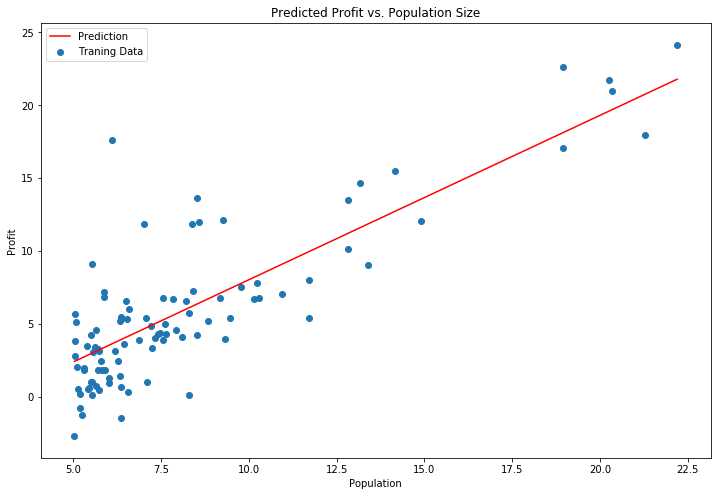

In [48]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5,1,'Error vs. Training Epoch')

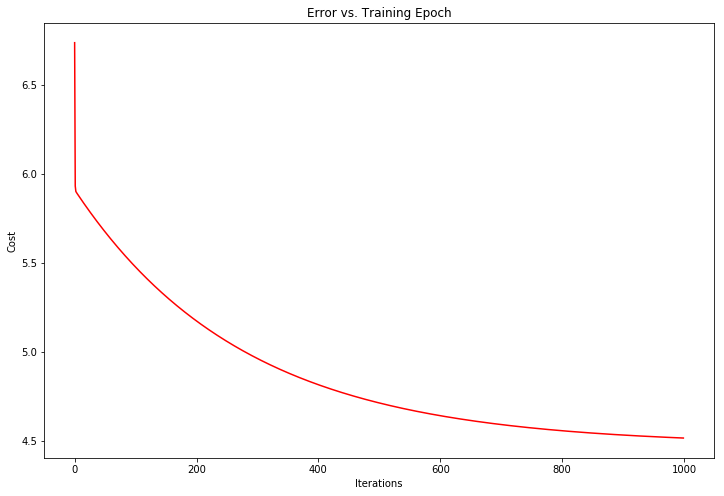

In [49]:
fig, ax = plt.subplots(figsize=(12,8))
iters = 1000
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [63]:
path2 = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path2, header=None, names=['Size', 'Bedrooms', 'Price'])

In [64]:
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [62]:
data2.head()

,Ones,Population,Profit
0,NaN,-0.529654,2.132905
1,NaN,-0.680150,0.597261
2,NaN,0.092716,1.419690
3,NaN,-0.298872,1.091575
4,NaN,-0.594333,0.178606


In [65]:
data2 = (data2 - data2.mean()) / data2.std()

# Insert the intercept
# add ones column
# data2 = data2.drop('Ones')
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
Y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = GradientDescent(X2, Y2, theta2, alpha = 0.01, iters = 1000)

# get the cost (error) of the model
computeCost(X2, Y2, g2)

0.13070336960771892

Text(0,0.5,'Cost function')

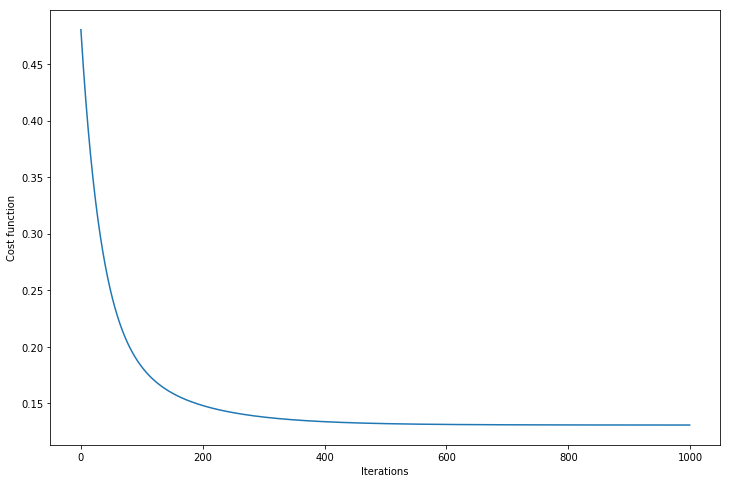

In [66]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(range(1000), cost2)
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost function")

In [67]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

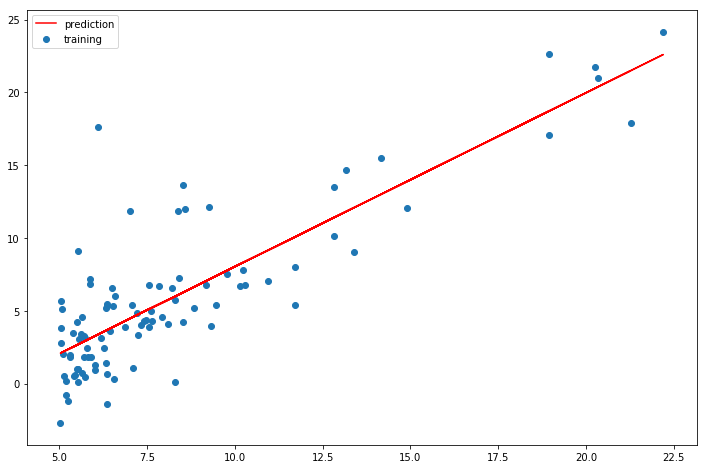

In [72]:
x = np.array(X[:,1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label = "prediction")
ax.scatter(data.Population, data.Profit, label = "training")
ax.legend(loc=2)